In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/TitanicDataset/Titanic_Data-2.html
/kaggle/input/TitanicDataset/titanic_data.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/TitanicDataset/titanic_data.csv')

In [3]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data = dataset.drop(['Name', 'Ticket', 'PassengerId', 'Embarked', 'Parch', 'Cabin'], axis = 1)
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250


In [5]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [6]:
data['Age'].fillna(data['Age'].median(), inplace = True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

In [7]:
data['Sex'] = pd.get_dummies(data['Sex'])
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,0,22.0,1,7.2500
1,1,1,1,38.0,1,71.2833
2,1,3,1,26.0,0,7.9250


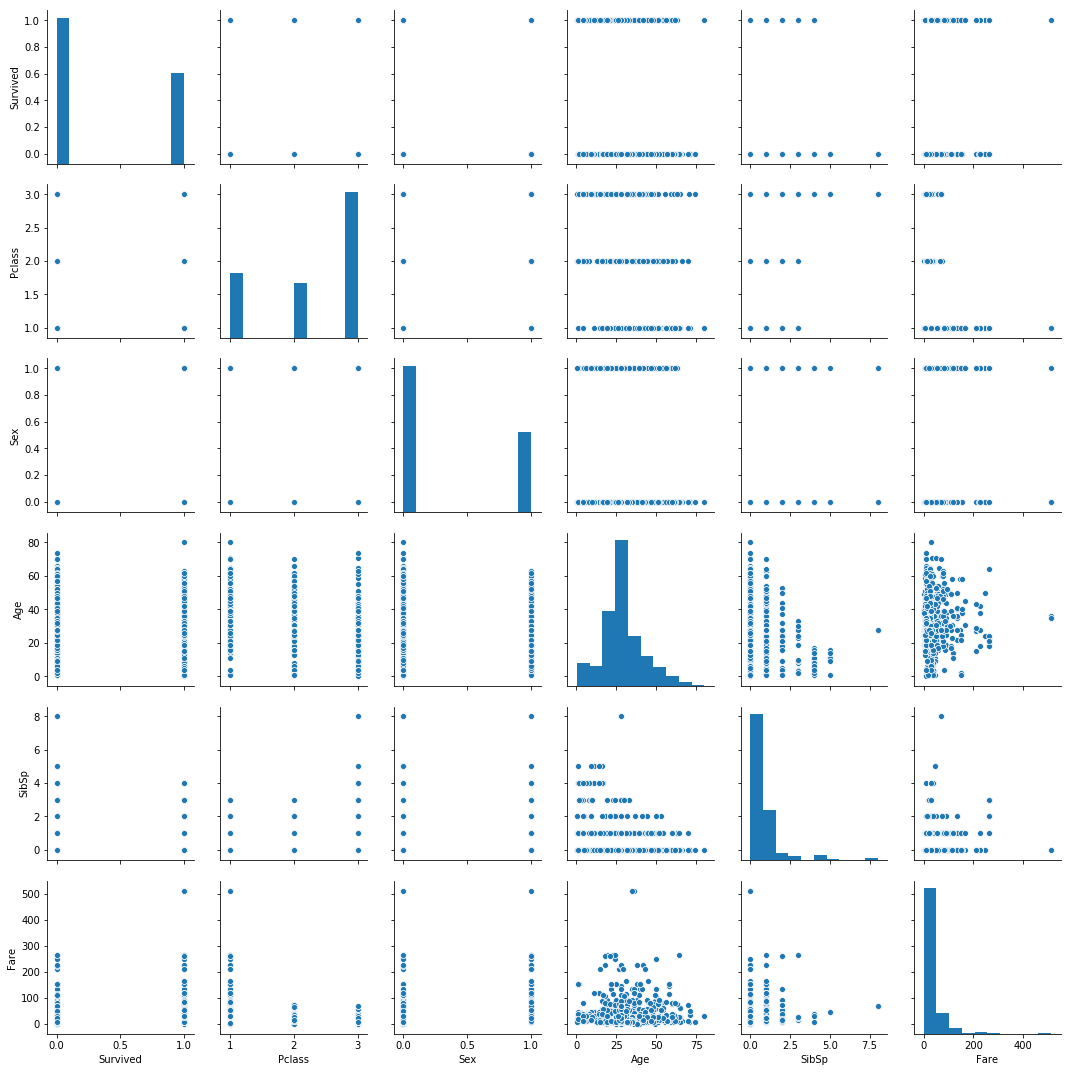

In [8]:
# male--> 0
# female--> 1
sns.pairplot(data)

In [9]:
((dataset.corr()).loc['Survived']).sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [10]:
((data.corr()).loc['Survived']).sort_values()

Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Fare        0.257307
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

In [11]:
data['Age'] = np.log(data['Age'])
data['SibSp'] = np.log(data['SibSp'])
data['Fare'] = np.log(data['Fare'])

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
data.replace(-np.inf, data.median(), inplace = True)
data['SibSp'].replace(-np.inf, 0, inplace = True)
data.median()

Survived    0.000000
Pclass      3.000000
Sex         0.000000
Age         3.332205
SibSp       0.000000
Fare        2.670985
dtype: float64

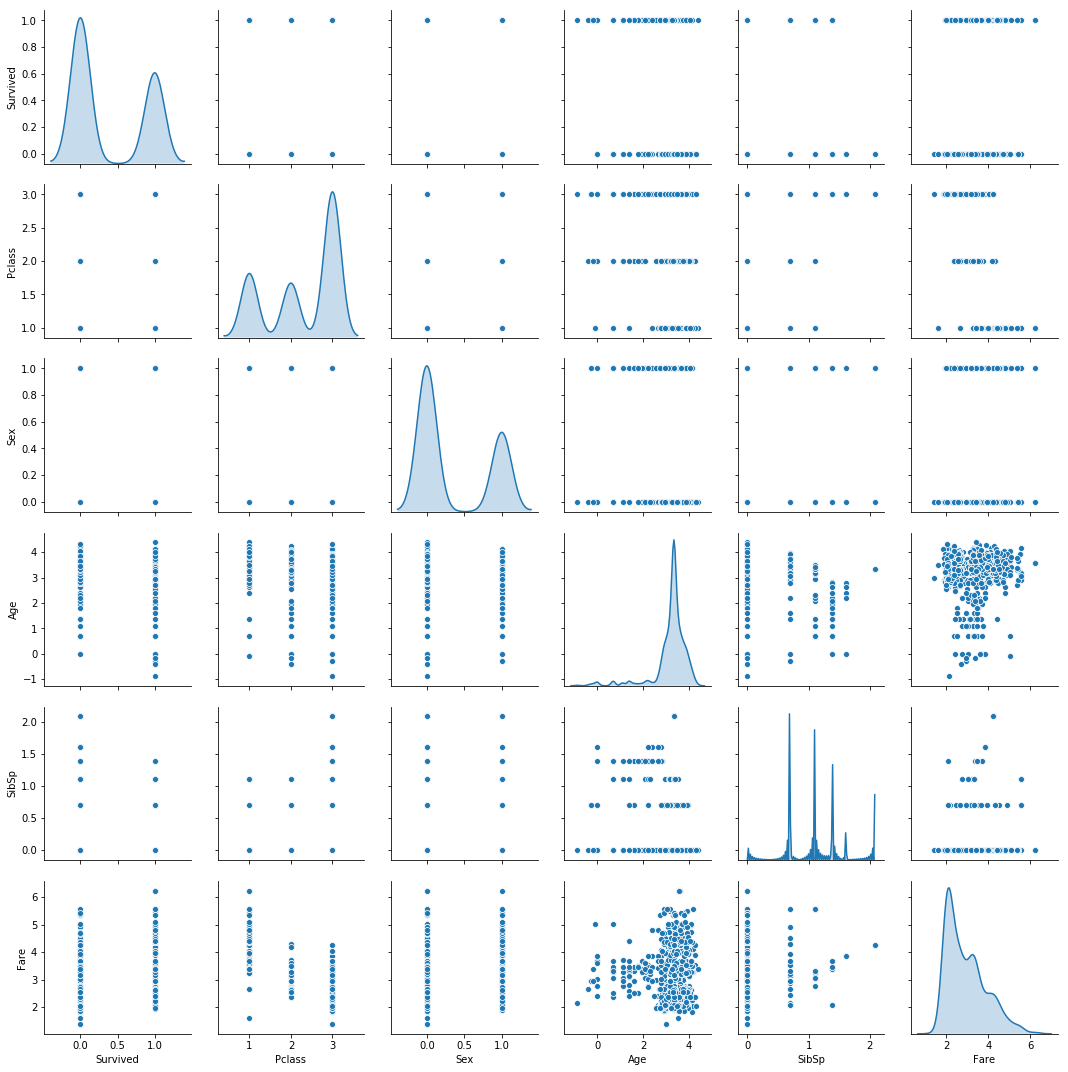

In [13]:
sns.pairplot(data, diag_kind='kde')

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,0,3.091042,0.0,1.981001
1,1,1,1,3.637586,0.0,4.266662
2,1,3,1,3.258097,0.0,2.070022


In [16]:
modified_data = pd.DataFrame(data['Age'])
modified_data['Fare'] =  data['Fare']
(modified_data).head(3)

,Age,Fare
0,3.091042,1.981001
1,3.637586,4.266662
2,3.258097,2.070022


In [17]:
pf = PolynomialFeatures(degree = 4)
polydata = pf.fit_transform(modified_data)
polydata = pd.DataFrame(polydata).drop(0, axis = 1)
polydata.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.091042,1.981001,9.554543,6.123360,3.924367,29.533499,18.927565,12.130384,7.774176,91.289301,58.505906,37.495533,24.030309,15.400655
1,3.637586,4.266662,13.232033,15.520351,18.204405,48.132660,56.456614,66.220093,77.672046,175.086699,205.365797,240.881293,282.538758,331.400372
2,3.258097,2.070022,10.615193,6.744333,4.284992,34.585324,21.973687,13.960919,8.870030,112.682324,71.592392,45.486022,28.899414,18.361160


In [18]:
polydata = pd.concat([data, polydata], axis = 1)
y = polydata['Survived']
x = polydata.drop('Survived', axis = 1)
polydata.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,3,0,3.091042,0.0,1.981001,3.091042,1.981001,9.554543,6.123360,3.924367,29.533499,18.927565,12.130384,7.774176,91.289301,58.505906,37.495533,24.030309,15.400655
1,1,1,1,3.637586,0.0,4.266662,3.637586,4.266662,13.232033,15.520351,18.204405,48.132660,56.456614,66.220093,77.672046,175.086699,205.365797,240.881293,282.538758,331.400372
2,1,3,1,3.258097,0.0,2.070022,3.258097,2.070022,10.615193,6.744333,4.284992,34.585324,21.973687,13.960919,8.870030,112.682324,71.592392,45.486022,28.899414,18.361160


In [19]:
(polydata.corr().loc['Survived']).sort_values()

Pclass     -0.338481
Age        -0.122370
1          -0.122370
SibSp      -0.101263
3          -0.094577
6          -0.075512
10         -0.060651
11          0.141236
7           0.166827
4           0.201606
12          0.245763
8           0.267287
13          0.276459
14          0.282371
9           0.302868
5           0.318148
2           0.326531
Fare        0.326531
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
ss = StandardScaler()

In [21]:
trainx, testx, trainy, testy = train_test_split(x, y, random_state = 1)

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(trainx, trainy)
print(f'training accuracy = {dtc.score(trainx, trainy)}')
print(f'testing accuracy = {dtc.score(testx, testy)}')

training accuracy = 0.9865269461077845
testing accuracy = 0.757847533632287


split = 7
Average acc = 0.8206333336129848 


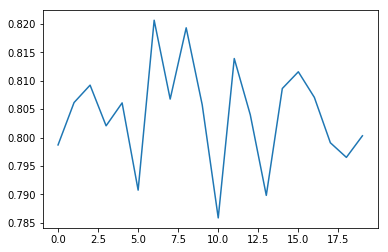

In [23]:
acc = []
for splits in range(20):
    false_acc = []
    trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = splits+1)
    scaled_trainx = ss.fit_transform(trainx)
    scaled_testx = ss.transform(testx)
    for depth in range(10):
        dtc = DecisionTreeClassifier(max_depth=depth+1, criterion='gini')
        scores = cross_val_score(dtc, scaled_trainx, trainy, cv = 10, scoring='roc_auc')
        false_acc.append(scores.mean())
    acc.append(sum(false_acc)/len(false_acc))
print(f'split = {acc.index(max(acc))+1}\nAverage acc = {max(acc)} ')
state = acc.index(max(acc))+1
plt.plot(acc)     

depth = 3
Average acc = 0.8647922679172678 


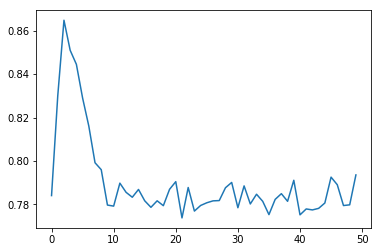

In [24]:
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = state)
scaled_trainx = ss.fit_transform(trainx)
scaled_testx = ss.transform(testx)
acc = []
pred_acc = []
for depth in range(50):
    dtc = DecisionTreeClassifier(max_depth=depth+1, criterion='gini')
    scores = cross_val_score(dtc, scaled_trainx, trainy, cv = 10, scoring = 'roc_auc')
    acc.append(scores.mean())
print(f'depth = {acc.index(max(acc))+1}\nAverage acc = {max(acc)} ')
depth = acc.index(max(acc))+1
plt.plot(acc)
plt.plot(pred_acc)

In [25]:
dtc = DecisionTreeClassifier(max_depth=depth, criterion='gini')
dtc.fit(scaled_trainx, trainy)
print(f'training accuracy = {dtc.score(scaled_trainx, trainy)}')
print(f'testing accuracy = {dtc.score(scaled_testx, testy)}')

training accuracy = 0.8426966292134831
testing accuracy = 0.7597765363128491


In [26]:
from sklearn import metrics 

depth = 1
Average train_acc = 0.7104247104247104 
depth = 5
Average test_acc = 0.7518796992481204 


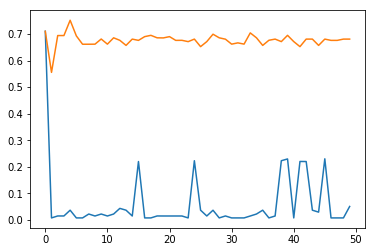

In [27]:
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 1)
scaled_trainx = ss.fit_transform(trainx)
scaled_testx = ss.transform(testx)
train_acc = []
test_acc = []
for depth in range(50):
    dtc = DecisionTreeClassifier(max_depth=depth+1, criterion='gini')
    dtc.fit(scaled_trainx, trainy)
    score_train = metrics.f1_score(trainy, dtc.predict(trainx))
    score_test = metrics.f1_score(testy, dtc.predict(scaled_testx))
    train_acc.append(score_train)
    test_acc.append(score_test)
print(f'depth = {train_acc.index(max(train_acc))+1}\nAverage train_acc = {max(train_acc)} ')
print(f'depth = {test_acc.index(max(test_acc))+1}\nAverage test_acc = {max(test_acc)} ')
plt.plot(train_acc)
plt.plot(test_acc)

In [28]:
dtc = DecisionTreeClassifier(max_depth=5, criterion='gini')
dtc.fit(scaled_trainx, trainy)
print(f'training accuracy = {dtc.score(scaled_trainx, trainy)}')
print(f'testing accuracy = {dtc.score(scaled_testx, testy)}')

training accuracy = 0.8764044943820225
testing accuracy = 0.8156424581005587
